In [1]:
%load_ext autoreload
%autoreload 2

## Shape analysis

The goal is to have a generalized algorithm that for all symmetrically equivalent cluster centers, find nearest atoms from trajectory, and transforms them back to the asymmetric unit. This helps the statistics for performing shape analysis and making plots.

As input:

1. crystal or material structure
    - contains cluster centers
    - includes symmetry operations
2. trajectory
    - typically P1
    - maybe a supercell of crystal structure
    - lattice can be triclinic (non-constrained in simulation)

Algorithm:

1. load clusters (pymatgen structure)
2. load trajectory (pymatgen trajectory)
3. reduce supercell of trajectory to match clusters
    - assert trajectory and cluster lattices match
4. for every unique cluster center, 
    5. for every symmetry operation
    - apply next symmetry operation to cluster center
    - find all trajectory points within X distance
    - copy and map points back to asymmetric unit (reverse symmetry op)
    - subtract cluster center coords
10. perform shape analysis
    - plots, fits, heat maps, msd, etc
   
See: https://github.com/GEMDAT-repos/GEMDAT/pull/166

In [2]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from gemdat import Trajectory
from gemdat.io import read_cif

trajectory = Trajectory.from_vasprun(
    Path(
        '/home/stef/md-analysis-matlab-example-short/shape_analysis/vasprun.xml'
    ))

supercell = (2, 1, 1)

diff_trajectory = trajectory.filter('Li')

# structure = load_known_material('argyrodite')
structure = read_cif(
    '/home/stef/md-analysis-matlab-example-short/shape_analysis/argyrodite_48h48h16e.cif'
)

/home/stef/python/gemdat/.venv/lib64/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [3]:
from gemdat.shape import ShapeAnalyzer

sa = ShapeAnalyzer.from_structure(structure)

In [4]:
thresh = 1.0  # Å
shapes = sa.analyze_trajectory(trajectory=trajectory,
                               supercell=supercell,
                               threshold=thresh)


48h: [0.183 0.183 0.024]

size: 4359, mean:  0.201  0.186  0.017
size: 4675, mean:  0.184  0.204  0.029
size: 5447, mean:  0.203  0.181  0.026
size: 5345, mean:  0.188  0.191  0.035
size: 4675, mean:  0.204  0.184  0.029
size: 4359, mean:  0.186  0.201  0.017
size: 5345, mean:  0.191  0.188  0.035
size: 5447, mean:  0.181  0.203  0.026
size: 3303, mean:  0.200  0.175  0.038
size: 3670, mean:  0.199  0.193  0.028
size: 4996, mean:  0.161  0.195  0.032
size: 4743, mean:  0.200  0.175  0.013
size: 3670, mean:  0.193  0.199  0.028
size: 3303, mean:  0.175  0.200  0.038
size: 4743, mean:  0.175  0.200  0.013
size: 4996, mean:  0.195  0.161  0.032
size: 3501, mean:  0.197  0.197  0.036
size: 1678, mean:  0.195  0.180  0.018
size: 3266, mean:  0.201  0.180  0.046
size: 1426, mean:  0.188  0.175  0.023
size: 1678, mean:  0.180  0.195  0.018
size: 3501, mean:  0.197  0.197  0.036
size: 1426, mean:  0.175  0.188  0.023
size: 3266, mean:  0.180  0.201  0.046
size: 3648, mean:  0.197  0.205  0.02

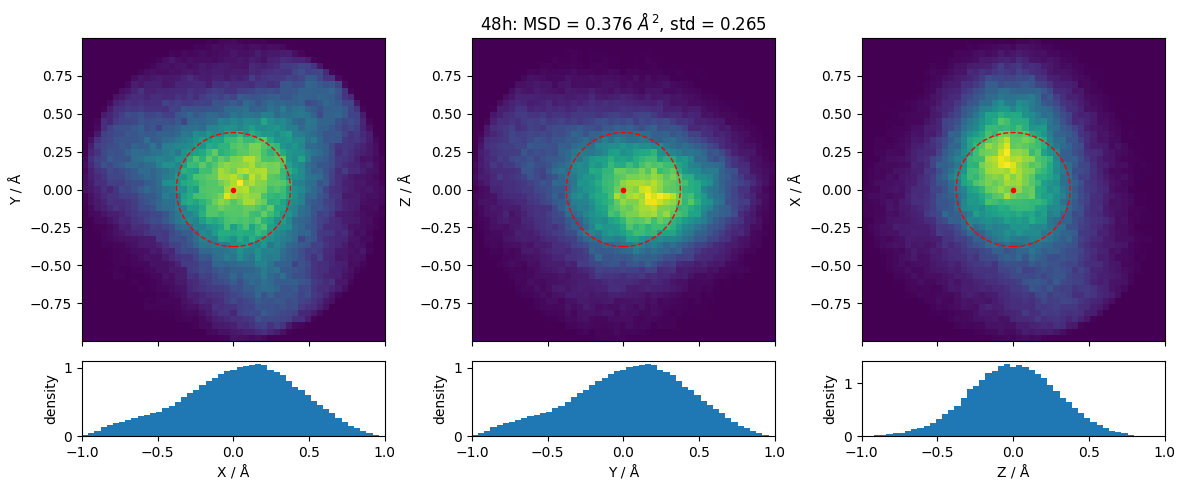

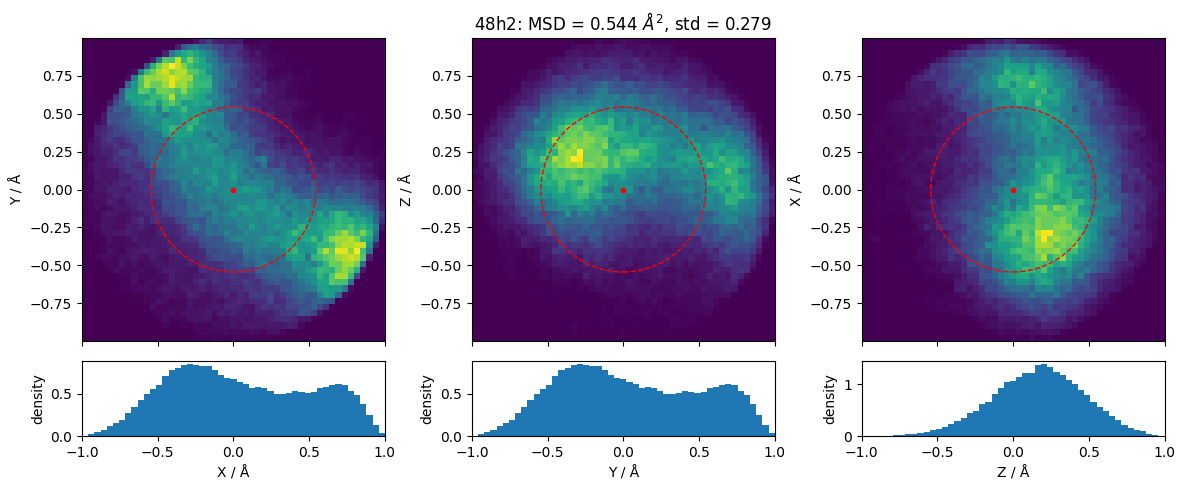

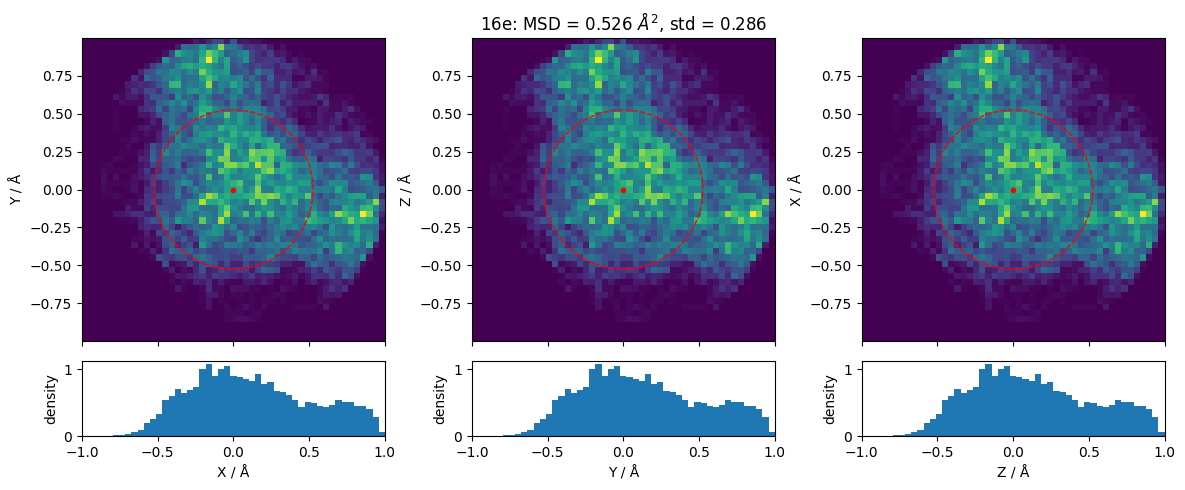

In [5]:
import matplotlib.pyplot as plt

from gemdat.shape import plot_shape

bins = np.linspace(-thresh, thresh, 50)

for shape in shapes:
    plot_shape(shape, bins=bins)
    plt.show()